## Importing Necessary Libraries...

In [1]:
import numpy as np
import pandas as pd


# Visualizatin
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.model_selection import train_test_split

# Model Selection

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Loading datasets...

In [2]:
db = pd.read_csv("train.csv")

In [3]:
type(db)

pandas.core.frame.DataFrame

## Exploratory Data Analysis

In [4]:
db.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Understanding Variables and DataFram

In [5]:
db.shape

(381109, 12)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [9]:
db[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


## Target variable(Response)

0    334399
1     46710
Name: Response, dtype: int64

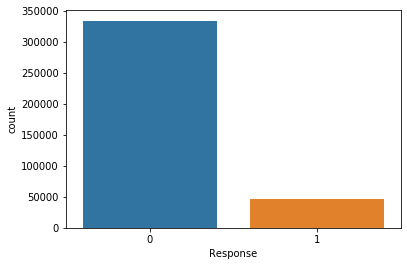

In [10]:
sns.countplot(db.Response)
db.Response.value_counts()

### Age distribution of customers

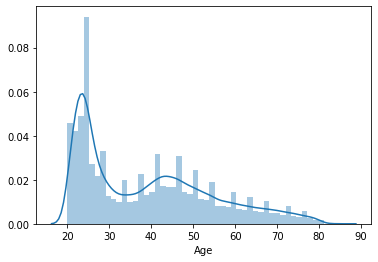

In [11]:
sns.distplot(db.Age)

## Gender and Response

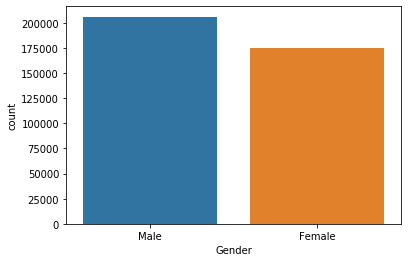

In [12]:
sns.countplot(db.Gender)

In [13]:
df=db.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

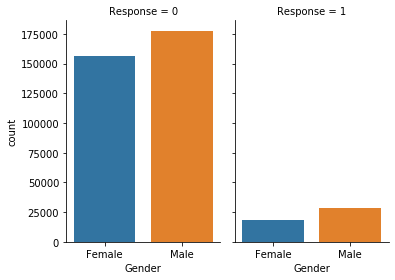

In [14]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

## Driving License by Gender

In [15]:
dd=db.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
dd

,Gender,Driving_License
0,Female,175020
1,Male,206089


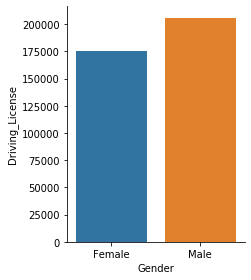

In [16]:
sns.catplot(x="Gender", y="Driving_License",
                data=dd, kind="bar", height=4, aspect=.9);

## Vehicle Age

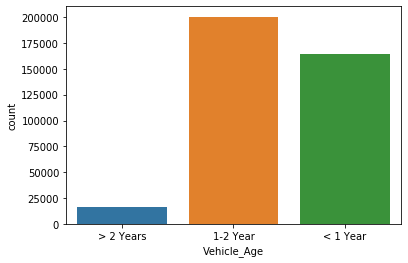

In [17]:
sns.countplot(db.Vehicle_Age)

## Respone and Vehicle Age

In [18]:
VR=db.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
VR

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


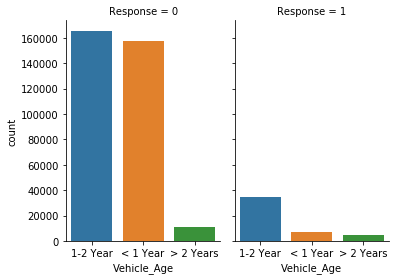

In [19]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=VR, kind="bar",
                height=4, aspect=.7);

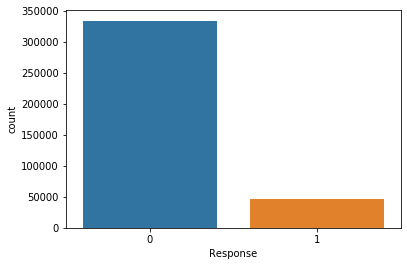

In [20]:
db.Response.value_counts()
sns.countplot(db["Response"])

## balance data ....

1    46710
0    46710
Name: Response, dtype: int64

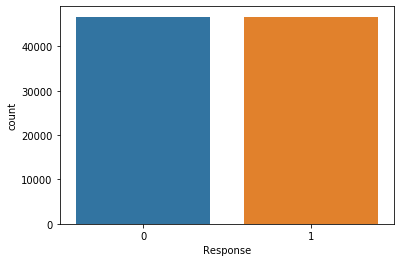

In [21]:
one = db.loc[db["Response"] == 1]
zero = db.loc[db["Response"] == 0]

zero = zero.iloc[0:len(one)]

db = pd.concat([one, zero], axis = 0)

sns.countplot(db["Response"])
db.Response.value_counts()

## some preliminary feature engineering...

In [22]:
db.Gender.replace("Female","0",inplace=True)
db.Gender.replace("Male","1",inplace=True)
db.Vehicle_Age.replace("> 2 Years","1",inplace=True)
db.Vehicle_Age.replace("1-2 Year","0.5",inplace=True)
db.Vehicle_Age.replace("< 1 Year","0",inplace=True)
db.Vehicle_Damage.replace("Yes","1",inplace=True)
db.Vehicle_Damage.replace("No","0",inplace=True)

In [23]:
Y=db.Response
X=db.drop("Response",axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0,test_size=0.2,shuffle=True)

# DecisionTree

In [31]:
tree = DecisionTreeClassifier(max_depth = 1,random_state=0)
tree.fit(X_train, y_train)



print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))



Accuracy on training set: 0.929
Accuracy on test set: 0.930


# RandomForest

In [27]:
forest = RandomForestClassifier(n_estimators=2, random_state=2)
forest.fit(X_train, y_train)



print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.964
Accuracy on test set: 0.918


# GradientBoosting

In [28]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.930
Accuracy on test set: 0.930


# Neural networks

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=[10,10],activation="tanh")
mlp.fit(X_train, y_train)


print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.84
Accuracy on test set: 0.84
